In [74]:
import numpy as np
import xarray as xr
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from keras import models, layers
from keras.layers import Input
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
aod = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/MERRA_aod_regrid.nc")
pwv00 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_pwv00_regrid.nc")
cw00 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_cw00_regrid.nc")
tk200 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_tk200_regrid.nc")
ps00 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_ps00_regrid.nc")
qv200 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_qv200_regrid.nc")
pwv12 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_pwv12_regrid.nc")
cw12 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_cw12_regrid.nc")
tk212 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_tk212_regrid.nc")
ps12 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_ps12_regrid.nc")
qv212 = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/GFS_qv212_regrid.nc")
imerg = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/clean_data/imerg_regrid.nc")

In [5]:
def normalize_to_range(values, original_min, original_max, new_min=0, new_max=1):
    return new_min + (values - original_min) * (new_max - new_min) / (original_max - original_min)

In [65]:
pwv12.lat.values

array([32.05, 32.15, 32.25, 32.35, 32.45, 32.55, 32.65, 32.75, 32.85,
       32.95, 33.05, 33.15, 33.25, 33.35, 33.45, 33.55, 33.65, 33.75,
       33.85, 33.95, 34.05, 34.15, 34.25, 34.35, 34.45, 34.55, 34.65,
       34.75, 34.85, 34.95, 35.05, 35.15, 35.25, 35.35, 35.45, 35.55,
       35.65, 35.75, 35.85, 35.95, 36.05, 36.15, 36.25, 36.35, 36.45,
       36.55, 36.65, 36.75, 36.85, 36.95, 37.05, 37.15, 37.25, 37.35,
       37.45, 37.55, 37.65, 37.75, 37.85, 37.95, 38.05, 38.15, 38.25,
       38.35, 38.45, 38.55, 38.65, 38.75, 38.85, 38.95, 39.05, 39.15,
       39.25, 39.35, 39.45, 39.55, 39.65, 39.75, 39.85, 39.95, 40.05,
       40.15, 40.25, 40.35, 40.45, 40.55, 40.65, 40.75, 40.85, 40.95,
       41.05, 41.15, 41.25, 41.35, 41.45, 41.55, 41.65, 41.75, 41.85,
       41.95, 42.05, 42.15, 42.25, 42.35, 42.45, 42.55, 42.65, 42.75,
       42.85, 42.95, 43.05, 43.15, 43.25, 43.35, 43.45, 43.55, 43.65,
       43.75, 43.85, 43.95, 44.05, 44.15, 44.25, 44.35, 44.45, 44.55,
       44.65, 44.75,

In [145]:
np.isnan(ps00.ps.values).sum()


0

In [6]:
aod00_values = aod["AODANA"].values
aod00_values = aod00_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = aod00_values.min()
data_max = aod00_values.max()
print(data_min, data_max)
# Normalize to [0, 1]
aod00_normal = normalize_to_range(aod00_values, data_min, data_max)
aod00_normal.shape

-0.0002094373892734953 18.828499221801607


(10224, 140, 150)

In [7]:
pwv00_values = pwv00["pwv"].values
pwv00_values = pwv00_values[:, ::-1, :]
# # Get the minimum and maximum values of the variable
data_min = pwv00_values.min()
data_max = pwv00_values.max()
print(data_min, data_max)

# # Normalize to [0, 1]
pwv00_normal = normalize_to_range(pwv00_values, data_min, data_max)
pwv00_normal.shape
# type(pwv_values)

-6.133454799640523 99.73744277947904


(10224, 140, 150)

In [8]:
cw00_values = cw00["cw"].values
cw00_values = cw00_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = cw00_values.min()
data_max = cw00_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
cw00_normal = normalize_to_range(cw00_values, data_min, data_max)
cw00_normal.shape

0.0 5.471999931334786


(10224, 140, 150)

In [66]:
tk200_values = tk200["tk2"].values
tk200_values = tk200_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = tk200_values.min()
data_max = tk200_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
tk200_normal = normalize_to_range(tk200_values, data_min, data_max)
tk200_normal.shape

230.6000000000119 322.1400085449227


(10224, 140, 150)

In [9]:
ps00_values = ps00["ps"].values
ps00_values = ps00_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = ps00_values.min()
data_max = ps00_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
ps00_normal = normalize_to_range(ps00_values, data_min, data_max)
ps00_normal.shape

-2.9955663680881126 104852.21093749395


(10224, 140, 150)

In [10]:
qv200_values = qv200["qv2"].values
qv200_values = qv200_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = qv200_values.min()
data_max = qv200_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
qv200_normal = normalize_to_range(qv200_values, data_min, data_max)
qv200_normal.shape

5.371703039703542e-16 298.8202819824166


(10224, 140, 150)

In [29]:
pwv12_values = pwv12["pwv"].values
pwv12_values = pwv12_values[:, ::-1, :]
# # Get the minimum and maximum values of the variable
data_min = pwv12_values.min()
data_max = pwv12_values.max()
print(data_min, data_max)

# # Normalize to [0, 1]
pwv12_normal = normalize_to_range(pwv12_values, data_min, data_max)
pwv12_normal.shape

0.10000000149490518 65.29114837646459


(10224, 140, 150)

In [31]:
cw12_values = cw12["cw"].values
cw12_values = cw12_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = cw12_values.min()
data_max = cw12_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
cw12_normal = normalize_to_range(cw12_values, data_min, data_max)
cw12_normal.shape

0.0 7.900000095364561


(10224, 140, 150)

In [147]:
tk212_values = tk212["tk2"].values
tk212_values = tk212_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = tk212_values.min()
data_max = tk212_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
tk212_normal = normalize_to_range(tk212_values, data_min, data_max)
tk212_normal.shape

230.82400207518864 323.44000244140705


(10224, 140, 150)

In [143]:
ps12_values = ps12["ps"].values
ps12_values = ps12_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = ps12_values.min()
data_max = ps12_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
ps12_normal = normalize_to_range(ps12_values, data_min, data_max)
ps12_normal.shape

64889.09375001281 104828.46093749434


(10224, 140, 150)

In [146]:
qv212_values = qv212["qv2"].values
qv212_values = qv212_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = qv212_values.min()
data_max = qv212_values.max()
print(data_min, data_max)

# Normalize to [0, 1]
qv212_normal = normalize_to_range(qv212_values, data_min, data_max)
qv212_normal.shape

0.0 0.021371364593505714


(10224, 140, 150)

In [ ]:
imerg_values = imerg["precipitation"].values
imerg_values = imerg_values[:, ::-1, :]
# Get the minimum and maximum values of the variable
data_min = imerg_values.min()
data_max = imerg_values.max()
print(data_min, data_max)
# Normalize to [0, 1]
imerg_normal = normalize_to_range(imerg_values, data_min, data_max)
imerg_normal.shape

In [13]:
#single mean per
imerg_mean = imerg.mean(dim=("lat", "lon"))

imerg_mean = imerg_mean["precipitation"].values
imerg_mean = imerg_mean.astype(np.float64)


data_min = imerg_mean.min()
data_max = imerg_mean.max()

print(data_min, data_max)

imerg_mean = normalize_to_range(imerg_mean, data_min, data_max)
imerg_mean.shape



0.0 1.3120375871658325


(10224,)

In [72]:
# combined_array = np.stack((aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal), axis=-1)
combined_array = np.stack((aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal), axis=-1)

combined_array.shape

(10224, 140, 150, 5)

In [56]:
subset_train_input = combined_array[:7500]
subset_train_output = imerg_mean[:7500]

subset_test_input = combined_array[7500:]
subset_test_output = imerg_mean[7500:]

In [75]:
n_samples, height, width, n_channels = combined_array.shape
flattened_input = combined_array.reshape(n_samples, -1)

# Apply RFE for feature selection
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=140*150*5, step=10)  # Adjust n_features_to_select as needed
selector = selector.fit(flattened_input, imerg_mean)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

# (Optional) Map these indices back to their original positions
selected_positions = [(idx // (width * n_channels), (idx % (width * n_channels)) // n_channels, (idx % (width * n_channels)) % n_channels) for idx in selected_indices]
print("Selected feature positions (height, width, channel):", selected_positions)

In [69]:
selected_features = selector.get_support(indices=True)
for feature in selected_features:
    print(f"Selected Feature: {feature}")

Selected Feature: 0
Selected Feature: 1
Selected Feature: 2
Selected Feature: 3
Selected Feature: 4
Selected Feature: 5
Selected Feature: 6
Selected Feature: 7
Selected Feature: 9
Selected Feature: 10
Selected Feature: 11
Selected Feature: 13
Selected Feature: 14
Selected Feature: 15
Selected Feature: 17
Selected Feature: 18
Selected Feature: 19
Selected Feature: 21
Selected Feature: 22
Selected Feature: 23
Selected Feature: 25
Selected Feature: 26
Selected Feature: 27
Selected Feature: 29
Selected Feature: 30
Selected Feature: 31
Selected Feature: 33
Selected Feature: 34
Selected Feature: 35
Selected Feature: 37
Selected Feature: 38
Selected Feature: 39
Selected Feature: 41
Selected Feature: 42
Selected Feature: 43
Selected Feature: 45
Selected Feature: 46
Selected Feature: 47
Selected Feature: 49
Selected Feature: 50
Selected Feature: 51
Selected Feature: 53
Selected Feature: 54
Selected Feature: 55
Selected Feature: 57
Selected Feature: 58
Selected Feature: 59
Selected Feature: 61
S

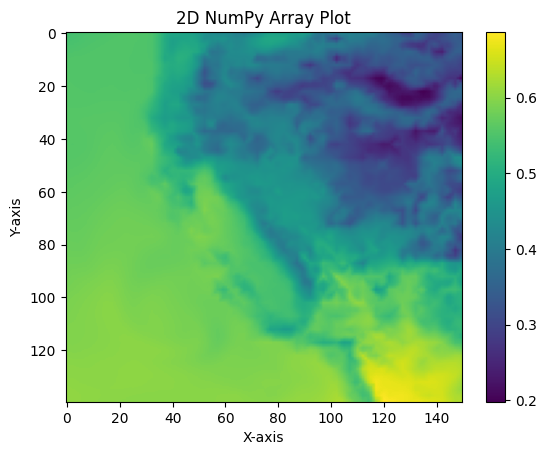

In [75]:
plt.imshow(tk212_normal[0], cmap='viridis')  # You can choose different colormaps like 'gray', 'hot', etc.
plt.colorbar()  # Add a colorbar to show the scale
plt.title("2D NumPy Array Plot")
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:

model = models.Sequential()
model.add(Input(shape=(140, 150, 4)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8192, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16384, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(21000))

# Reshape to the original image dimensions
model.add(layers.Reshape((140, 150)))

In [57]:
# FOR MEAN PRECIPITATION
model = models.Sequential()
model.add(Input(shape=(140, 150, 4)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(1500, activation='relu'))
# model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [58]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 138, 148, 64)   │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 69, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 326784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │    41,828,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,839,169 (159.60 MB)

 Trainable params: 41,839,169 (159.60 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


2024-07-22 10:02:56.534635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-22 10:02:56.534653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-22 10:02:56.534742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-22 10:02:56.534759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [59]:
model.compile(optimizer = 'adam', 
              loss=tf.keras.losses.MeanSquaredError(), 
              metrics=['mean_squared_error'])

history = model.fit(subset_train_input, subset_train_output, epochs = 5,
                    validation_data = (subset_test_input, subset_test_output))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - loss: 8.7482 - mean_squared_error: 8.7482 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 8.0803e-04 - mean_squared_error: 8.0803e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 8.3489e-04 - mean_squared_error: 8.3489e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


BEST MODEL:

\# FOR MEAN PRECIPITATION
model = models.Sequential()
model.add(Input(shape=(140, 150, 5))) #(aod00_normal, pwv00_normal, cw00_normal, pwv12_normal, cw12_normal)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
\# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
\# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
\# model.add(layers.Dense(1500, activation='relu'))
\# model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 181ms/step - loss: 1.2073 - mean_squared_error: 1.2073 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0049 - val_mean_squared_error: 0.0049

In [21]:
model.evaluate(subset_test_input, subset_test_output, )


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0037 - mean_squared_error: 0.0037


[0.004754805471748114, 0.004754805471748114]

In [60]:
testing = model.predict(subset_test_input, verbose='auto')

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [23]:
print(subset_test_output[100], testing[100])

0.02255524691425327 [0.05132362]


In [ ]:
plt.imshow(subset_test_output[2, :, :], cmap='viridis')  # You can choose different colormaps like 'gray', 'hot', etc.
plt.colorbar()  # Add a colorbar to show the scale
plt.title("2D NumPy Array Plot")
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
plt.imshow(testing[2, :, :], cmap='viridis')  # You can choose different colormaps like 'gray', 'hot', etc.
plt.colorbar()  # Add a colorbar to show the scale
plt.title("2D NumPy Array Plot")
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

Text(0, 0.5, 'Average Precipitation Across Map Area')

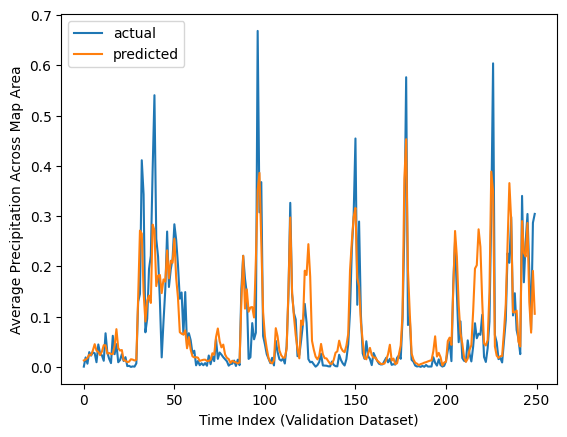

In [129]:
plt.plot(subset_test_output[:250], label = 'actual')
plt.plot(testing, label='predicted')

plt.legend()
plt.xlabel('Time Index (Validation Dataset)')
plt.ylabel('Average Precipitation Across Map Area')

Text(0, 0.5, 'Average Precipitation Across Map Area')

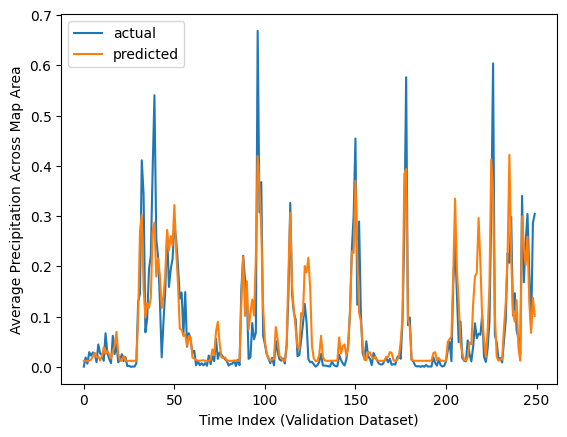

In [95]:
plt.plot(subset_test_output[:250], label = 'actual')
plt.plot(testing, label='predicted')

plt.legend()
plt.xlabel('Time Index (Validation Dataset)')
plt.ylabel('Average Precipitation Across Map Area')

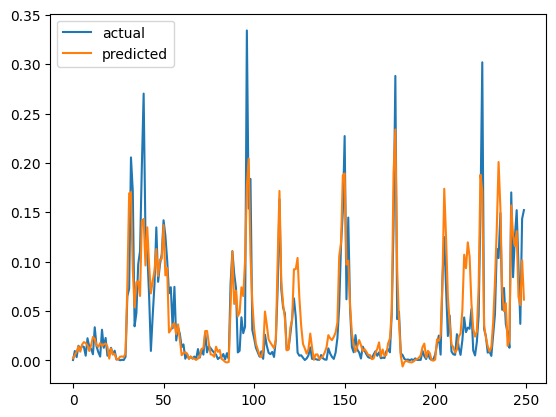

In [62]:
plt.plot(subset_test_output[:250], label = 'actual')
plt.plot(testing[:250], label='predicted')

plt.legend()

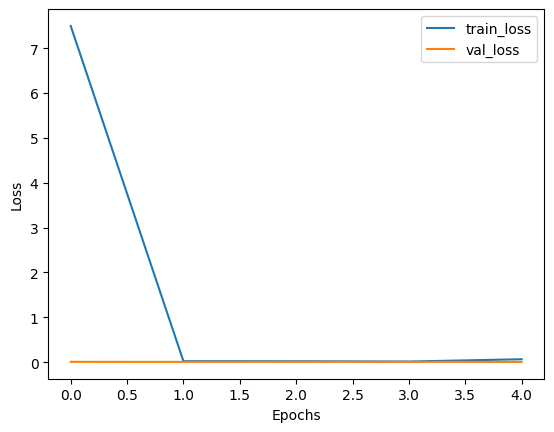

In [24]:
#128, 64
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.ylim([data_min, 0.2])
plt.legend(loc='lower right')

In [16]:
test_loss, test_acc = model.evaluate(subset_test_input,  subset_test_output, verbose=2)

print(test_loss, test_acc)

86/86 - 1s - 14ms/step - loss: 0.0138 - mean_squared_error: 0.0138
0.013801557943224907 0.013801557943224907
